# Diving into logistic regression

Here we will look at one of the most common classification algorithms: **logistic regression**. Unlike its cousin linear regression, logistic regression is used to solve classification problems instead of regression problems.

When we have a set of features that describre a binary outocome like "Yes" or "No", we usually have a problem well suited for logistic regression. In the real life, it can be used to classify an e-mail as spam or not, a transaction as fraudulent or not, etc. 

As a first approach, we could try to fit a regression line at our problem, like the figure below. So, we can define a threshold like:

\begin{matrix}
if \ y_{pred} \geq 0.5 \ then \ "Yes" \\ 
if \ y_{pred} < 0.5 \ then \ "No"
\end{matrix}

However, as it is possible to verify visually in the plot below, we would lose a lot of information and make some very bad predictions.

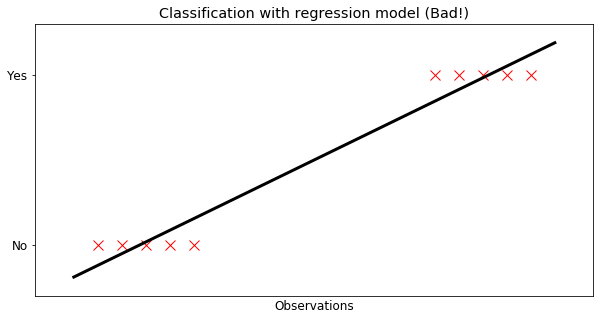

In [15]:
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to show plot code.''')
display(tag)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


plt.plot(np.linspace(-5, -9, 5), np.zeros(5), linestyle='none', marker = 'x', markersize= 10, color='red')
plt.plot(np.linspace(5, 9, 5), np.full(5, 1), linestyle='none', marker = 'x', markersize= 10, color='red')
plt.margins(0.08)
x = np.concatenate((np.linspace(-5, -9, 5), np.linspace(5, 9, 5)))
y = np.concatenate((np.zeros(5), np.full(5, 1)))
beta_1, beta_0 = np.polyfit(x , y, 1)
x_plot = np.linspace(-10, 10, 100)
plt.plot(x_plot, x_plot*beta_1 + beta_0, color='black', linewidth = 3.0)
plt.yticks(np.arange(2), ('No', 'Yes'), fontsize = 'large')
plt.xticks([])
plt.xlabel('Observations', fontsize = 'large')
plt.title('Classification with regression model (Bad!)', fontsize = 'x-large')
plt.show()

To solve this problem, we can use the sigmoid function to model our data. The sigmoid function takes a parameter **z** and outputs values between 0 and 1. These values can be understood as the probabilities related to our outcomes of interest. The function, also called logistic function, is define as:

$$g(z) = \dfrac{1}{1 + e^{-z}}$$

Now lets see how it fit much better to our data. Given a feature value, the function outputs the probability of we getting "Yes" as a response. So, we can classify values under 0.5 as "No" and otherwise as "Yes". But, in essence, its output is a probability.

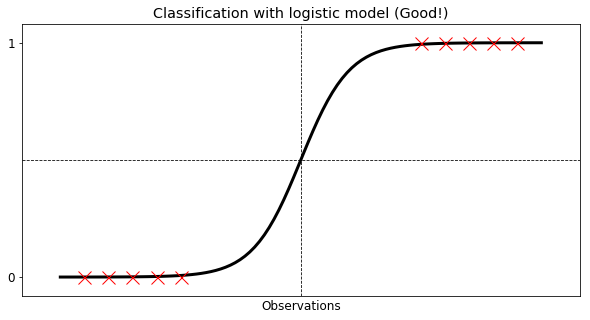

In [16]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to show plot code.''')
display(tag)


def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x), linestyle='-', linewidth = 3.0, zorder=5, color='black')
plt.axvline(linestyle='--', linewidth = 0.8, color='black')
plt.axhline(y = 0.5, linestyle='--', linewidth = 0.8, color='black')
plt.plot(np.linspace(-5, -9, 5), np.zeros(5), linestyle='none', marker = 'x', markersize= 13, color='red', zorder=20)
plt.plot(np.linspace(5, 9, 5), np.full(5, 1), linestyle='none', marker = 'x', markersize= 13, color='red', zorder=20)
plt.margins(0.08)
plt.yticks(np.arange(2), ('0', '1'), fontsize = 'large')
plt.xticks([])
plt.xlabel('Observations', fontsize = 'large')
plt.title('Classification with logistic model (Good!)', fontsize = 'x-large')
plt.show()

To implement this algorithm, we will take the linear regession model and plug it into the sigmoid function. Defining the linear model as


$$h_\theta (x) = \theta^{T}x$$


where $\theta^{T}x$ is simply a matrix notation for $\theta_0 + \ \theta_1 x_1 + \ \theta_2 x_2 + \ ... \ + \ \theta_n x_n$ and $\theta$ are the parameters of our model. By plugging it into the sigmoid function, we have the hypothesis for our logistic regression model.


$$h_\theta (x) = \dfrac{1}{1 + e^{\ \theta^{Tx}}}$$


Therefore, to fit to the model the data, we have to optimize the parameters $\theta$. We do this by minimizing a cost function. As a first try, we could use the most common cost function for linear regression (since the parameters are the same of a linear model), the mean sum of squares.

$$J(\theta) = \dfrac{1}{N} \ \sum_{i}^{N} (h_\theta (x_i) - y_i)^{2}$$

However, the term $h_\theta (x_i)$ now is our logistic model since we pluged in the linear model into the sigmoid function. Because of that, this term now has a strong non-linearity associated with it. If we try to plot $J(\theta)$ againts $\theta$ we would see that this cost function happens to be non-convex. A non-convex function means that it has a bunch of local minimum points instead of a one solid absolut minimum. A non-convex function is a hill with a lot of valleys, whereas a convex function is a hill with just one big valley. This characteristic turns out to be a problem because we are going to use an optimization algorithm (gradient descent) that searches for that valleys. If we have a lot of local minimum, the algorithm will not converge easily.

Since in a classification problem the output is either 1 or 0, we can define a new convex cost function for logistic regression.

$$ J(\theta) =\begin{cases}
- log(h_\theta(x)) \ \ if \ y = 1\\ 
-log(1 - h_\theta(x)) \ \ if \ y = 0
\end{cases}$$

The plot below shows the shape of this cost function.

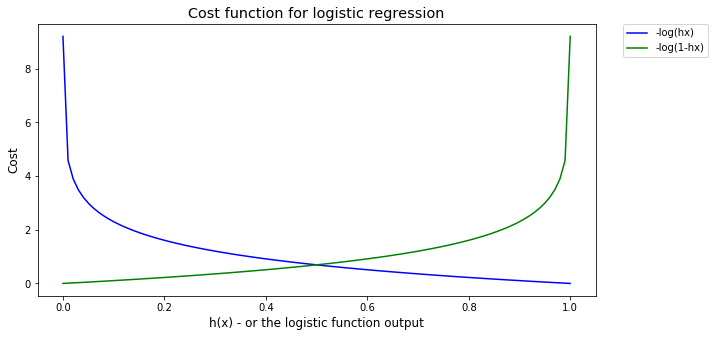

In [10]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to show plot code.''')
display(tag)

def cost_function_plot(x, y_value):
    if y_value == 1:
        return -np.log(x)
    if y_value == 0:
        return -np.log(1 - x)

x_plot = np.linspace(0.0001,0.9999,100) 
# Here, 'x' is h_theta(x), the output of the logistic model. Therefore, its values range from 0 to 1.
# I used 0.0001 instead of 0 and 0.9999 instead of 1 to avoid getting log(0).

plt.plot(x_plot, cost_function_plot(x_plot, 1), color = 'blue', label = '-log(hx)')
plt.plot(x_plot, cost_function_plot(x_plot, 0), color = 'green', label = '-log(1-hx)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('h(x) - or the logistic function output', fontsize = 'large')
plt.ylabel('Cost', fontsize = 'large')
plt.title('Cost function for logistic regression', fontsize='x-large')
plt.show()

Intuitively, if the data is "Yes" (or 1), and we are using the blue function with a predicted value $h_\theta (x)$ of 1, the cost will go to zero. On the other hand, if the predicted value is 0 (a missed prediction), the cost function will penalyze it by a large amount. The same is true for the green function. So, this makes sense.

Finally, we can combine those two separate functions into one big cost function that will be always valid. Doing so, we arrive at:

$$J(\theta) = - \dfrac{1}{N} \ [ \sum_{i}^{N} y_i \ log h_\theta (x_i) + (1 - y_i)log(1 - h_\theta (x_i)) \ ]$$

It is possible to se that if we feed $y_i$ = 1, we arrive at the blue function. Otherwise, if we feed $y_i$ = 0, we end up getting the green function. So, we just combined the two into one more general cost function and took the mean of it. It is good to note that the choice of this specifically cost function can be derived using the principle of maximum likelihood estimation, which will not be explored here.

Now, we will use gradient descent as our optimizing algorithm.

## Gradient Descent

Gradient descent is one of the most famous optimization algorithms. It's goal is to minimize the cost function. Consider the graph of the cost function againts one weight or parameter. If it is a convex cost function, it will have just one valley or absolute minimum. We want to reach that minimum. If we took the derivative of the cost function on a certain parameter value of $\theta$ we get the slope of the curve. The point in doing that is that the slope always points to the closest valley! Hence, we multiply the value of the slope by a constant called 'learning rate', which determines how fast we are moving through the curve. Then, we actualize the parameter $\theta$ by adding to it the product learning rate * slope. Next, we do the same for the next value of $\theta$, and again, and again.... it is an iterative process!

Note, in the figure below, that we compute more iterations as we get close to the valley. Thats because our slope value is reducing, so the increment on the parameter gets shorter and shorter...

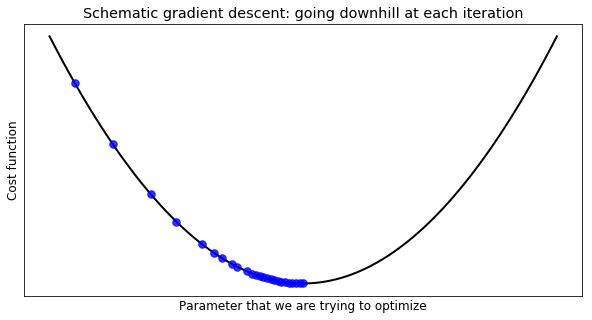

In [11]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Click <a href="javascript:code_toggle()">here</a> to show plot code.''')
display(tag)


x_grad_graph = np.linspace(-10, 10, 100)
y_grad_graph = x_grad_graph ** 2

x_no_valley = np.array([-9, -7.5, -6, -5, -4, -3.5, -3.2, -2.8, -2.6, -2.2])
x_valley = np.linspace(-2.0,0,15)
x_scatter_graph = np.concatenate((x_no_valley, x_valley))
y_scatter = x_scatter_graph ** 2
plt.plot(x_scatter_graph, y_scatter, linestyle='none', marker='.', color='blue', zorder=10, markersize=15, alpha=0.8)
plt.plot(x_grad_graph, y_grad_graph, linestyle = '-', linewidth = 2, color= 'black')
plt.xticks([])
plt.yticks([])
plt.ylabel('Cost function', fontsize='large')
plt.xlabel('Parameter that we are trying to optimize', fontsize='large')
plt.title('Schematic gradient descent: going downhill at each iteration', fontsize='x-large')
plt.show()

Step-by-step:

* Calculate the derivative of the cost function assuming values for the parameters (in general, start with 0)

* Compute 'slope' times 'learning rate' (the incremental). The learning rate is how fast we are 'walking' towards the valley.

* Subtract the incremental from the actual value of the parameter. Here, if the slope is negative, the increment will be positive. It means that we are 'walking' towards the minimum value (or slope 0).

* Use the new value of the parameter to start the process again

* Stop when maximum number of iterations is reached.

Considering a parameter $\theta$, we update its value following the equation

$$\theta_j := \theta_j - \alpha \ \dfrac{\partial}{\partial \theta_j} J(\theta)$$

Doing the derivative for the cost function $J(\theta)$ with respect to each parameter $\theta_j$ we arrive at

$$\dfrac{\partial}{\partial \theta_j} J(\theta) = \dfrac{1}{N} \ \sum_{i}^{N} (h_\theta (x_i) - y_i)x_{ij}$$

Applying these on an iterative process, we can arrive at the values of $\theta$ that minimizes our cost function. By doing so, we are going to be fitting our model!

After some of the mathematical background, we can start to implement the logistic regression model.

We are going to start by generating a random sample dataset to work with. Using sklearn's module to generate samples and plotting those, we can have a sense of the job to be done...

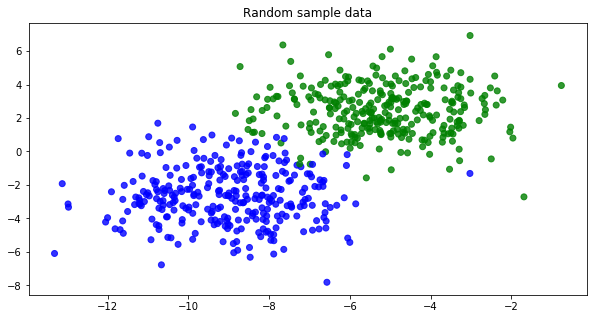

In [12]:
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd

X, y = make_blobs(n_samples=600, centers=2, n_features=2, random_state=84, cluster_std = 1.5)
df = pd.DataFrame({'feature_1': X[:,0], 'feature_2': X[:,1], 'labels': y})
colors = {0: 'blue', 1: 'green'}

plt.scatter(df['feature_1'], df['feature_2'], c = df['labels'].apply(lambda x: colors[x]), alpha=0.8)
plt.title('Random sample data')
plt.show()

The decision boundary is pretty intuitive to draw and we hope to get a nice accuracy with our algorithm. Starting by defining the cost function.

Optimized params: 
Theta_0 = [5.00418591], Theta_1 = [0.75218594], Theta_2 = [2.03624847] 

Accuracy score from training data: 0.981


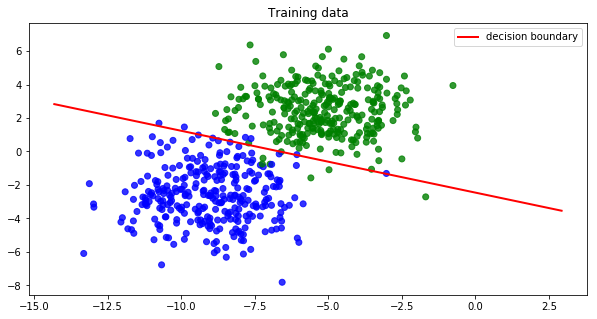

Accuracy score from test data: 0.975


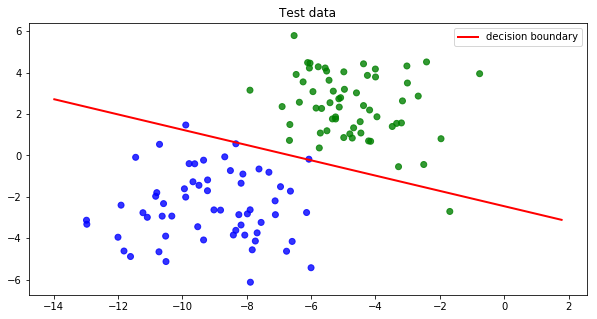

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 0)

def logistic_loss_func(y, y_pred):
    return - np.mean(y * np.log(y_pred) + (1-y)*np.log(1-y_pred))

# The sigmoid function is already defined!

# Reshape for lineaer algebra operations
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Adding the bias vector to the X_train and X_test
bias_param = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X_train, bias_param),axis=1)
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))),axis=1)

# Gradient descent parameters
iteractions = 5000
theta = np.zeros((3,1))
n = len(y_train)
learning_rate = 0.1

for i in range(iteractions):
    Z = np.dot(X_train, theta)
    y_pred = sigmoid(Z)
    loss = logistic_loss_func(y_train, y_pred)
    d_theta = 1/n*(np.matmul(X_train.T, y_pred - y_train))

    theta = theta - learning_rate*d_theta

# Parameters theta after the iterations are completed

print('Optimized params: \nTheta_0 = {}, Theta_1 = {}, Theta_2 = {} \n'.format(theta[2], theta[0], theta[1]))   

# Makign predictions based on the thrashold

preds = []
for i in y_pred:
    if i >= 0.5:
        preds.append(1)
    else:
        preds.append(0)
  

# Computing model's accuracy on the training set
print('Accuracy score from training data: {:.3f}'.format(accuracy_score(preds,y_train)))

# Printing the decision boundary for the train set
df_train = pd.DataFrame({'feature_1': X_train[:,0], 'feature_2': X_train[:,1], 'labels': y_train[:,0]})
colors = {0: 'blue', 1: 'green'}
plt.scatter(df['feature_1'], df['feature_2'], c = df['labels'].apply(lambda x: colors[x]), alpha=0.8, label = '')
plt.title('Training data')

x_decision_bound = [np.min(X_train[:, 0] - 1), np.max(X_train[:, 1] -4 )]
y_decision_bound = - (theta[2] + theta[0]*x_decision_bound) / theta[1]
plt.plot(x_decision_bound, y_decision_bound, linewidth = 2.0, color='red', label = 'decision boundary')
plt.legend()
plt.show()

# Computing the predictions for the test data, based on the params we fitted
preds_test = []
y_pred_test = sigmoid(np.dot(X_test, theta))

for i in y_pred_test:
    if i >= 0.5:
        preds_test.append(1)
    else:
        preds_test.append(0)
 
# Computing accuracy on the test set
print('Accuracy score from test data: {:.3f}'.format(accuracy_score(preds_test, y_test)))

# Printing the decision boundary for the test set
df_train = pd.DataFrame({'feature_1': X_test[:,0], 'feature_2': X_test[:,1], 'labels': y_test[:,0]})
colors = {0: 'blue', 1: 'green'}
plt.scatter(df_train['feature_1'], df_train['feature_2'], c = df_train['labels'].apply(lambda x: colors[x]), alpha=0.8, label='')
plt.title('Random sample test data')

x_test_decision_bound = [np.min(X_test[:, 0] - 1), np.max(X_test[:, 1] - 4)]
y_test_decision_bound = - (theta[2] + theta[0]*x_test_decision_bound) / theta[1]
plt.plot(x_test_decision_bound, y_test_decision_bound, linewidth = 2.0, color='red', label = 'decision boundary')
plt.legend()
plt.title('Test data')
plt.show()

Now, we are going to fit the same dataset to the sklearn logistic regression and compare the results.

In [14]:
from sklearn.linear_model import LogisticRegression

X_train_2 = np.delete(X_train,2,axis=1)
X_test_2 = np.delete(X_test,2,axis=1)
y_train_2 = np.ravel(y_train)
y_test_2 = np.ravel(y_test)

clf = LogisticRegression()
clf.fit(X_train_2, y_train_2)

print('Sklearn train data score: ', clf.score(X_train_2, y_train_2))
print('Sklearn test data score: ', clf.score(X_test_2, y_test_2))

Sklearn train data score:  0.975
Sklearn test data score:  0.9833333333333333


# Conclusion

The performance of the model we built from scratch was:

* Training set: 0.98
* Test set: 0.975

The performance of sklearn's model was:

* Train set: 0.975
* Test set: 0.983

It is possible to see that, comparing these two, the performance of sklearn's model was smaller in the train set but bigger in the test set. This is due to the regularization. By default, sklearn apply L2 or Ridge regularization to the cost function. Basically, it adds a term that penalyzes large coefficients in the cost function, turning the cost to something like:

$$J(\theta) = - \dfrac{1}{N} \ [ \sum_{i}^{N} y_i \ log h_\theta (x_i) + (1 - y_i)log(1 - h_\theta (x_i)) \ ] + \lambda \sum_{i}^{N} \theta_i$$

Regularization is good because it prevents overfitting. That explains why our model performed better in the training set: because it was a little bit overfitted! Overfitting is bad because in general our model loses the capacity to generalize well to new unseen data. When you regularize the cost function, you are probabily increasing the performance of the model to the test data. In other words, the predictive power of the model is enhanced!

As a next step for improving the model we built are: adding regularization and multi-feature capacity (because we have only used two features!)